<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%206%20-%20Lesson%203%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2020-11-01 22:07:15--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4001:806::2010, 2800:3f0:4001:812::2010, 2800:3f0:4001:819::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4001:806::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

     0K .......... .......... .......... .......... ..........  0%  609K 2m21s
    50K .......... .......... .......... .......... ..........  0% 5.64M 78s
   100K .......... .......... .......... .......... ..........  0% 5.79M 57s
   150K .......... .......... .......... .......... ..........  0% 6.01M 46s
   200K .......... .......... .......... .......... ..........  0% 6.22M 39s
   250K .......... .......... .......... .......... ..........  0% 6.68M 3

 11050K .......... .......... .......... .......... .......... 12% 42.7M 5s
 11100K .......... .......... .......... .......... .......... 12% 48.1M 5s
 11150K .......... .......... .......... .......... .......... 13% 32.7M 5s
 11200K .......... .......... .......... .......... .......... 13% 32.0M 5s
 11250K .......... .......... .......... .......... .......... 13% 38.0M 5s
 11300K .......... .......... .......... .......... .......... 13% 33.1M 5s
 11350K .......... .......... .......... .......... .......... 13% 20.9M 5s
 11400K .......... .......... .......... .......... .......... 13% 40.5M 5s
 11450K .......... .......... .......... .......... .......... 13% 46.8M 5s
 11500K .......... .......... .......... .......... .......... 13% 26.7M 5s
 11550K .......... .......... .......... .......... .......... 13% 28.5M 5s
 11600K .......... .......... .......... .......... .......... 13% 18.9M 5s
 11650K .......... .......... .......... .......... .......... 13% 42.6M 5s
 11700K ....

 67350K .......... .......... .......... .......... .......... 78% 22.3M 1s
 67400K .......... .......... .......... .......... .......... 78% 36.7M 1s
 67450K .......... .......... .......... .......... .......... 78% 21.9M 1s
 67500K .......... .......... .......... .......... .......... 78% 39.8M 1s
 67550K .......... .......... .......... .......... .......... 78% 42.1M 1s
 67600K .......... .......... .......... .......... .......... 78% 25.2M 1s
 67650K .......... .......... .......... .......... .......... 78% 28.4M 1s
 67700K .......... .......... .......... .......... .......... 78% 28.4M 1s
 67750K .......... .......... .......... .......... .......... 78% 27.2M 1s
 67800K .......... .......... .......... .......... .......... 79% 27.1M 1s
 67850K .......... .......... .......... .......... .......... 79% 39.7M 1s
 67900K .......... .......... .......... .......... .......... 79% 32.6M 1s
 67950K .......... .......... .......... .......... .......... 79% 18.3M 1s
 68000K ....

last layer output shape:  (None, 7, 7, 768)


In [3]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


In [8]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

--2020-11-01 22:08:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4001:801::2010, 2800:3f0:4001:814::2010, 2800:3f0:4001:803::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4001:801::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: '/tmp/cats_and_dogs_filtered.zip'

     0K .......... .......... .......... .......... ..........  0%  512K 2m11s
    50K .......... .......... .......... .......... ..........  0% 6.41M 70s
   100K .......... .......... .......... .......... ..........  0% 6.69M 50s
   150K .......... .......... .......... .......... ..........  0% 6.12M 40s
   200K .......... .......... .......... .......... ..........  0% 6.26M 34s
   250K .......... .......... .......... .......... ..........  0% 6.43M 30s
   300K .......... .......... .......... .......... .......

 50100K .......... .......... .......... .......... .......... 74% 10.8M 1s
 50150K .......... .......... .......... .......... .......... 74% 10.5M 1s
 50200K .......... .......... .......... .......... .......... 75% 16.0M 1s
 50250K .......... .......... .......... .......... .......... 75% 19.6M 1s
 50300K .......... .......... .......... .......... .......... 75% 21.9M 1s
 50350K .......... .......... .......... .......... .......... 75% 18.9M 1s
 50400K .......... .......... .......... .......... .......... 75% 27.7M 1s
 50450K .......... .......... .......... .......... .......... 75% 31.9M 1s
 50500K .......... .......... .......... .......... .......... 75% 33.3M 1s
 50550K .......... .......... .......... .......... .......... 75% 27.5M 1s
 50600K .......... .......... .......... .......... .......... 75% 30.4M 1s
 50650K .......... .......... .......... .......... .......... 75% 39.2M 1s
 50700K .......... .......... .......... .......... .......... 75% 28.1M 1s
 50750K ....

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 23s - loss: 0.3651 - accuracy: 0.8580 - val_loss: 0.1153 - val_accuracy: 0.9500
Epoch 2/20
100/100 - 11s - loss: 0.2133 - accuracy: 0.9150 - val_loss: 0.0995 - val_accuracy: 0.9650
Epoch 3/20
100/100 - 12s - loss: 0.1952 - accuracy: 0.9210 - val_loss: 0.1126 - val_accuracy: 0.9670
Epoch 4/20
100/100 - 11s - loss: 0.1794 - accuracy: 0.9310 - val_loss: 0.1304 - val_accuracy: 0.9560
Epoch 5/20
100/100 - 12s - loss: 0.1845 - accuracy: 0.9330 - val_loss: 0.1317 - val_accuracy: 0.9580
Epoch 6/20
100/100 - 11s - loss: 0.1873 - accuracy: 0.9360 - val_loss: 0.0977 - val_accuracy: 0.9700
Epoch 7/20
100/100 - 12s - loss: 0.1677 - accuracy: 0.9345 - val_loss: 0.1104 - val_accuracy: 0.9670
Epoch 8/20
100/100 - 12s - loss: 0.1604 - accuracy: 0.9430 - val_loss: 0.1136 - val_accuracy: 0.9710
Epoch 9/20
100/100 - 11s - loss: 0.1410 - accuracy: 0.9490 - val_loss: 0.1351 - val_accuracy: 0.9690
Epoch 10/20
100/100 - 12s - loss: 0.1857 - accuracy: 0.9385 - val_loss: 0.1077 - val_accura

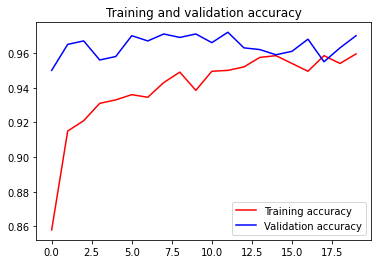

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()